# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import keras
import joblib
from sklearn import preprocessing
from keras import layers
from keras.utils import np_utils, get_file
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, OneClassSVM 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.utils import shuffle
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


### Utilities

In [53]:
def show_results(y_true,y_pred):
    print('=============Results=============')
    print("Accuracy => ", metrics.accuracy_score(y_true, y_pred))
    print("Precision => ",metrics.precision_score(y_true, y_pred, pos_label=None, sample_weight=None, average='weighted', zero_division=0, labels=np.unique(y_pred)))
    print('Mean Absolute Error =>', metrics.mean_absolute_error(y_true, y_pred))
    print('Mean Squared Error =>', metrics.mean_squared_error(y_true, y_pred))
    print('Root Mean Squared Error =>', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
    print('Classification Matrix :')
    print(confusion_matrix(y_true,y_pred))
    print('Classification Report :')
    print(classification_report(y_true,y_pred))
    print('=================================')
    
def categorical2numerical(array):
    numerical = []
    for elem in array:
        classification = np.argmax(elem)
        numerical.append(classification)
    return numerical


# with open('your_file.txt', 'w') as f:
#     for item in y_train.values.ravel():
#         print(item,file = f)

# with open('your_file2.txt', 'w') as f:
#     for item in y_train_nn:
#         print(item,file = f)

## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [70]:
dataDir = 'data/balanced_smoke_lixo.csv'
#dataDir = 'data/clean_data_with_lixo.csv'
data = pd.read_csv(dataDir)

best_columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure']

X = data[best_columns]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123) #shuffle=true by default

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1290, 6)
(1290, 1)
(903, 6)
(387, 6)
(903, 1)
(387, 1)


(430, 13)
(430, 13)


Normal Situation captures:  430
Anomalous Situation captures:  430


        sensors.id  sensors.pm25  sensors.pm10  sensors.temperature  \
count   430.000000    430.000000    430.000000           430.000000   
mean   2149.053488    494.089535    941.030233            18.338324   
std     705.726093    241.289190    542.476305             2.310234   
min     497.000000    121.800000    183.800000            11.397187   
25%    1837.500000    302.400000    541.750000            17.171748   
50%    2019.000000    465.300000    828.500000            18.578437   
75%    2189.500000    663.200000   1249.500000            19.585029   
max    4073.000000    999.900000   1999.900000            24.750508   

        sensors.gas  sensors.humidity  sensors.pressure  sensors.altitude  \
count    430.000000        430.000000        430.000000        430.000000   
mean   27815.930233         59.508128       1007.881355         45.134049   
std    13012.440059          5.543747 

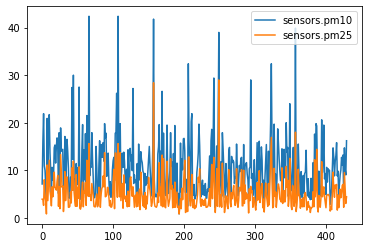

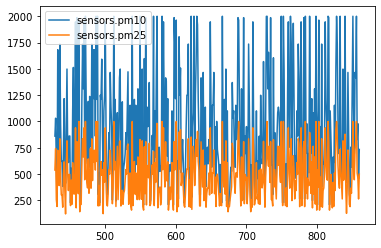

In [71]:
#Observação de dados
x0 = data.loc[data['sensors.classification'] == 0]
x1 = data.loc[data['sensors.classification'] == 1]


print(x0.shape)
print(x1.shape)
print('\n')

print("Normal Situation captures: ", x0.shape[0])
print("Anomalous Situation captures: ", x1.shape[0])
print('\n')

x0.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

x1.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

print(x1.describe())

## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"

#### SVM (Best Kernel)

In [5]:
# Prepare multiple classifiers with diferent kernels

kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [6]:
# Train and Test each of the kernels
for i in range(4):
    svn = getClassifier(i)
    svn.fit(X_train, y_train.values.ravel())
    svn_y_pred = svn.predict(X_test)
    print('<<<<<<<<')
    print("Algorithm: SVM")
    print("Evaluation:", kernels[i], "kernel")
    show_results(y_test,y_pred=svn_y_pred)
    print('>>>>>>>>')
    print('\n')

<<<<<<<<
Algorithm: SVM
Evaluation: Polynomial kernel
=============Results=============
Accuracy =>  0.3023255813953488
Precision =>  0.3023255813953488
Mean Absolute Error => 1.0594315245478036
Mean Squared Error => 1.7829457364341086
Root Mean Squared Error => 1.335269911453901
Classification Matrix :
[[  0   0 140]
 [  0   0 130]
 [  0   0 117]]
Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.00      0.00      0.00       130
           2       0.30      1.00      0.46       117

    accuracy                           0.30       387
   macro avg       0.10      0.33      0.15       387
weighted avg       0.09      0.30      0.14       387

>>>>>>>>


<<<<<<<<
Algorithm: SVM
Evaluation: RBF kernel
=============Results=============
Accuracy =>  0.32558139534883723
Precision =>  0.6856586992773763
Mean Absolute Error => 1.0129198966408268
Mean Squared Error => 1.689922480620155
Root

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<<<<<<<<
Algorithm: SVM
Evaluation: Linear kernel
=============Results=============
Accuracy =>  0.9948320413436692
Precision =>  0.9949188977916748
Mean Absolute Error => 0.0103359173126615
Mean Squared Error => 0.020671834625323
Root Mean Squared Error => 0.14377703093791788
Classification Matrix :
[[138   0   2]
 [  0 130   0]
 [  0   0 117]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       140
           1       1.00      1.00      1.00       130
           2       0.98      1.00      0.99       117

    accuracy                           0.99       387
   macro avg       0.99      1.00      0.99       387
weighted avg       0.99      0.99      0.99       387

>>>>>>>>




#### SVM Parameter Tuning - GridSearch

#### b. Model Trainig

In [7]:
#Implementing SVM with Grid Search for parameters
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
param_grid = {'C': [0.1], 'gamma': [1],'kernel': ['linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,n_jobs=-1,verbose=1)
grid.fit(X_train,y_train.values.ravel())
print('Best parameters => ', grid.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


Best parameters =>  {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


#### c. Output results

In [8]:
# Predition of the test sample
grid_pred = grid.predict(X_test)

In [9]:
show_results(y_true=y_test,y_pred=grid_pred)

=============Results=============
Accuracy =>  0.9948320413436692
Precision =>  0.9949188977916748
Mean Absolute Error => 0.0103359173126615
Mean Squared Error => 0.020671834625323
Root Mean Squared Error => 0.14377703093791788
Classification Matrix :
[[138   0   2]
 [  0 130   0]
 [  0   0 117]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       140
           1       1.00      1.00      1.00       130
           2       0.98      1.00      0.99       117

    accuracy                           0.99       387
   macro avg       0.99      1.00      0.99       387
weighted avg       0.99      0.99      0.99       387



#### d. Model Saving 

In [10]:
# Save the result of the gridsearch model which is the best

filename = 'model_saves/svm_gridsearch.sav'
pickle.dump(grid, open(filename, 'wb'))

In [11]:
filename = 'model_saves/svm_joblib.sav'
joblib.dump(grid, filename)

['model_saves/svm_joblib.pkl']

### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

In [72]:
num_classes = 3 # Number of classes right now (0-Normal,1-smoke,2-Smell)
y_train_nn = pd.get_dummies(y_train.values.ravel())
y_test_nn = pd.get_dummies(y_test.values.ravel())
print(X_train.shape)

(903, 6)


#### b. Model Train and Results

In [73]:
# Model Build
nn = keras.Sequential()

nn.add(layers.Dense(64,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(16,activation='relu'))
nn.add(layers.Dense(num_classes,activation='softmax'))

# Model Compile
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.build()

# Model Summary
print(nn.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_20 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 51        
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
# Model Training 
epochs = 30
batch_size = 128
nn.fit(X_train, y_train_nn.values, validation_data = (X_test, y_test_nn.values), epochs = epochs, verbose = 2, batch_size=batch_size, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)])

Train on 903 samples, validate on 387 samples
Epoch 1/30
 - 0s - loss: 1053.3952 - accuracy: 0.3289 - val_loss: 587.0118 - val_accuracy: 0.3618
Epoch 2/30
 - 0s - loss: 353.6590 - accuracy: 0.3212 - val_loss: 242.6046 - val_accuracy: 0.3359
Epoch 3/30
 - 0s - loss: 127.2985 - accuracy: 0.2746 - val_loss: 172.8494 - val_accuracy: 0.3333
Epoch 4/30
 - 0s - loss: 102.3318 - accuracy: 0.3278 - val_loss: 62.5076 - val_accuracy: 0.6331
Epoch 5/30
 - 0s - loss: 83.2670 - accuracy: 0.5836 - val_loss: 92.3564 - val_accuracy: 0.4780
Epoch 6/30
 - 0s - loss: 63.9030 - accuracy: 0.4640 - val_loss: 43.7802 - val_accuracy: 0.5814
Epoch 7/30
 - 0s - loss: 34.5549 - accuracy: 0.5460 - val_loss: 24.1985 - val_accuracy: 0.5788
Epoch 8/30
 - 0s - loss: 51.7355 - accuracy: 0.6423 - val_loss: 31.8758 - val_accuracy: 0.6331
Epoch 9/30
 - 0s - loss: 34.1451 - accuracy: 0.6190 - val_loss: 35.6409 - val_accuracy: 0.6253
Epoch 10/30
 - 0s - loss: 17.0817 - accuracy: 0.6047 - val_loss: 13.3800 - val_accuracy: 0.

In [75]:
# model testing
nn_y_pred = nn.predict(X_test).round()
print(nn_y_pred[:,0])

[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

In [76]:
# Transform categorical values into numerical
nnNumY_pred = categorical2numerical(nn_y_pred)

In [77]:
print("Algorithm: Keras Neural Network")
show_results(y_true=y_test,y_pred=nnNumY_pred)

Algorithm: Keras Neural Network
=============Results=============
Accuracy =>  0.6795865633074936
Precision =>  0.8157186010117553
Mean Absolute Error => 0.599483204134367
Mean Squared Error => 1.1576227390180878
Root Mean Squared Error => 1.0759287797145718
Classification Matrix :
[[ 25   7 108]
 [  0 128   2]
 [  0   7 110]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.18      0.30       140
           1       0.90      0.98      0.94       130
           2       0.50      0.94      0.65       117

    accuracy                           0.68       387
   macro avg       0.80      0.70      0.63       387
weighted avg       0.82      0.68      0.62       387



#### b. Model Train and Results - sklearn

In [78]:
#Param
mlp_gs = MLPClassifier(max_iter=10000)
parameter_space = {
    'hidden_layer_sizes': [(64,128,32),(128,16,4),(6,6,4),(10,)],
    'activation': ['tanh', 'relu','sigmoid', 'softmax'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#Model
sklNN = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=3)

#Train
sklNN.fit(X_train, y_train.values.ravel())
sklNN.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (64, 128, 32),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [79]:
sklNN_y_pred = sklNN.predict(X_test)
print(sklNN_y_pred)

[0 1 0 2 1 2 1 2 1 2 2 0 2 2 0 2 0 1 2 2 2 2 1 0 0 2 1 1 2 0 1 0 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 0 0 2 0 1 2 2 2 0 2 0 2 0 2 2 1 1 0 2 2 0 2 2 2 1 2 1
 0 2 1 2 1 1 1 0 2 1 2 2 2 2 2 2 1 2 2 0 2 0 2 1 2 2 1 1 1 0 2 1 1 1 1 0 0
 1 1 2 0 1 1 1 1 0 2 2 2 0 1 1 2 2 2 1 1 1 2 2 0 2 0 2 1 1 1 2 0 2 1 2 2 2
 0 0 2 0 2 1 2 1 0 2 1 2 0 2 1 1 0 1 1 0 2 2 1 1 1 1 1 0 0 2 2 1 2 2 2 0 0
 0 2 1 0 1 1 0 2 0 1 0 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 0 2 2 0 1 1 1 2 2 1 2
 1 2 2 2 2 1 1 1 0 1 2 0 2 2 2 0 2 2 2 1 2 1 2 2 2 1 2 2 0 2 2 0 0 2 0 0 0
 2 2 1 2 0 0 2 2 2 2 2 2 1 2 1 0 1 1 1 0 2 0 1 2 1 2 1 2 0 0 2 0 2 2 2 1 2
 1 0 1 2 1 1 2 2 2 2 0 2 2 2 2 1 2 0 2 2 2 2 2 2 2 0 2 2 1 2 2 2 1 1 2 2 0
 1 1 1 1 2 2 1 2 1 2 2 2 2 2 1 0 1 2 2 2 0 2 1 1 2 1 0 2 0 2 0 2 2 1 0 2 2
 2 2 2 2 1 1 1 0 2 1 2 1 2 2 2 2 1]


In [80]:
print("Algorithm: SK-Learn Neural Network")
show_results(y_true=y_test,y_pred=sklNN_y_pred)

Algorithm: SK-Learn Neural Network
=============Results=============
Accuracy =>  0.7777777777777778
Precision =>  0.8579546237430313
Mean Absolute Error => 0.3772609819121447
Mean Squared Error => 0.6873385012919897
Root Mean Squared Error => 0.8290588044837288
Classification Matrix :
[[ 77   3  60]
 [  0 110  20]
 [  0   3 114]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.55      0.71       140
           1       0.95      0.85      0.89       130
           2       0.59      0.97      0.73       117

    accuracy                           0.78       387
   macro avg       0.85      0.79      0.78       387
weighted avg       0.86      0.78      0.78       387



#### d. Model Saving 

In [83]:
#Neural Network implementada
filename = 'model_saves/nn.hdf5'
#pickle.dump(nn, open(filename, 'wb'))
nn.save(filename)

In [84]:
#Neural Network sklearn
filename = 'model_saves/sklearn_nn.sav'
pickle.dump(sklNN, open(filename, 'wb'))

### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [31]:
nb_classifier = GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = StratifiedKFold(n_splits=3) #cross validation
gaussNB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=cv, 
                 verbose=0, 
                 scoring='accuracy') 

gaussNB.fit(X_train, y_train.values.ravel())

gaussNB.best_params_

{'var_smoothing': 1e-07}

#### c. Output results

In [32]:
gaussNB_y_pred = gaussNB.predict(X_test)
print(gaussNB_y_pred)

[0 1 0 2 1 0 1 2 1 2 1 0 1 0 0 2 0 1 2 0 1 0 1 0 0 2 1 1 2 0 1 0 2 2 2 2 2
 0 2 0 2 2 1 0 1 0 1 0 0 2 0 1 2 0 2 0 2 0 1 0 2 2 1 1 0 2 0 0 2 2 0 1 0 1
 0 2 1 2 1 1 1 0 2 0 0 0 2 2 0 0 1 2 2 0 2 0 2 1 2 2 1 1 1 0 1 1 1 1 1 0 0
 1 1 2 0 1 1 1 1 0 2 0 0 0 1 1 0 1 0 1 1 1 1 2 0 2 0 2 1 1 1 2 0 2 1 2 2 2
 0 0 2 0 0 1 2 1 0 0 1 2 0 1 1 1 0 1 1 0 2 2 1 1 1 1 1 0 0 2 0 0 2 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 2 0 2 0 1 2 1 2 1 0 1 0 0 2 0 1 1 1 0 2 1 2
 1 2 2 0 2 1 1 1 0 1 0 0 2 2 2 0 0 2 2 1 2 1 2 2 2 1 0 2 0 2 1 0 0 0 0 0 0
 2 2 1 2 0 0 2 2 2 2 0 2 1 2 1 0 1 1 1 0 2 0 1 2 1 0 1 0 0 0 2 0 1 0 2 1 2
 1 0 1 2 1 1 2 2 1 1 0 1 0 0 2 0 2 0 2 2 2 2 2 2 2 0 1 2 1 2 0 2 1 1 2 0 0
 1 1 1 1 2 2 1 2 1 2 1 2 2 0 0 0 1 2 0 2 0 2 1 2 0 1 0 0 0 0 0 2 0 1 0 2 0
 0 2 0 1 1 1 1 0 0 1 2 1 2 0 0 2 1]


In [33]:
print("Algorithm: Naive Bayes")
show_results(y_true=y_test,y_pred=gaussNB_y_pred)

Algorithm: Naive Bayes
=============Results=============
Accuracy =>  0.979328165374677
Precision =>  0.9794329595673794
Mean Absolute Error => 0.041343669250646
Mean Squared Error => 0.082687338501292
Root Mean Squared Error => 0.28755406187583576
Classification Matrix :
[[135   0   5]
 [  0 130   0]
 [  3   0 114]]
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       140
           1       1.00      1.00      1.00       130
           2       0.96      0.97      0.97       117

    accuracy                           0.98       387
   macro avg       0.98      0.98      0.98       387
weighted avg       0.98      0.98      0.98       387



#### d. Model Saving 

In [34]:
filename = 'model_saves/gaussNB.sav'
pickle.dump(gaussNB, open(filename, 'wb'))

### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [36]:
#Param
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

#Model
rf = RandomForestClassifier()
randForestReg = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

#Train
randForestReg.fit(X_train, y_train.values.ravel())
randForestReg.best_params_

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  3.0min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 40}

#### c. Output results

In [37]:
# Predictions in test dataset
randForestReg_y_pred = randForestReg.predict(X_test)
print(randForestReg_y_pred)

[0 1 0 2 1 0 1 2 1 2 1 0 1 0 0 0 0 1 2 0 1 0 1 0 0 2 1 1 0 0 1 0 2 2 2 2 2
 0 2 0 2 2 1 0 1 0 1 0 0 2 0 1 2 0 2 0 2 0 1 0 2 2 1 1 0 2 0 0 2 2 0 1 0 1
 0 2 1 2 1 1 1 0 2 2 0 0 2 2 0 0 1 2 2 0 2 0 2 1 2 2 1 1 1 0 1 1 1 1 1 0 0
 1 1 2 0 1 1 1 1 0 2 0 0 0 1 1 0 1 0 1 1 1 1 2 0 2 0 2 1 1 1 2 0 2 1 2 2 2
 0 0 2 0 0 1 2 1 0 0 1 2 0 1 1 1 0 1 1 0 2 2 1 1 1 1 1 0 0 2 0 0 2 1 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 2 0 2 0 1 2 1 2 1 0 1 0 0 2 0 1 1 1 0 2 1 2
 1 2 2 0 2 1 1 1 0 1 0 0 2 2 2 0 0 2 2 1 2 1 2 2 2 1 0 2 0 2 1 0 0 0 0 0 0
 2 2 1 2 0 0 2 2 2 2 0 2 1 2 1 0 1 1 1 0 2 0 1 2 1 0 1 0 0 0 2 0 1 0 2 1 2
 1 0 1 0 1 1 2 2 1 1 0 1 0 0 2 2 2 0 2 2 2 2 2 2 2 0 1 2 1 2 0 2 1 1 2 0 0
 1 1 1 1 2 2 1 2 1 2 1 2 2 0 2 0 1 2 0 2 0 2 1 2 0 1 0 0 0 0 0 2 0 1 0 2 0
 0 2 0 1 1 1 1 0 0 1 2 1 2 0 0 2 1]


In [38]:
print("Algorithm: Random Forest")
show_results(y_true=y_test,y_pred=randForestReg_y_pred)

Algorithm: Random Forest
=============Results=============
Accuracy =>  0.9948320413436692
Precision =>  0.9949188977916748
Mean Absolute Error => 0.0103359173126615
Mean Squared Error => 0.020671834625323
Root Mean Squared Error => 0.14377703093791788
Classification Matrix :
[[138   0   2]
 [  0 130   0]
 [  0   0 117]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       140
           1       1.00      1.00      1.00       130
           2       0.98      1.00      0.99       117

    accuracy                           0.99       387
   macro avg       0.99      1.00      0.99       387
weighted avg       0.99      0.99      0.99       387



#### d. Model Saving 

In [39]:
filename = 'model_saves/randomforest.sav'
pickle.dump(randForestReg, open(filename, 'wb'))

## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [40]:
n_clusters = 3
#init=centroids
kmeans = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 10000, n_init= 10, n_clusters = n_clusters, verbose = 0, random_state=1234, n_jobs=-1)
kmeans.fit(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(max_iter=10000, n_clusters=3, n_jobs=-1, random_state=1234)

#### c. Output results

In [41]:
kmeans_clusters = kmeans.cluster_centers_
print('Cluster Centers  => ', kmeans_clusters)
print('Train labels => ', kmeans.labels_)

Cluster Centers  =>  [[7.14604839e+01 1.33360484e+02 1.04100571e+01 6.66027043e+04
  5.81256267e+01 9.90240603e+02]
 [5.46266667e+00 1.07906667e+01 1.84770104e+01 1.42769780e+05
  5.76011167e+01 9.95592269e+02]
 [3.61411549e+02 6.79815748e+02 1.74020416e+01 2.68016247e+04
  5.78083082e+01 1.00439843e+03]]
Train labels =>  [2 2 1 2 2 2 1 1 0 1 1 1 1 2 1 2 2 2 0 0 1 2 0 0 2 2 1 0 2 2 2 0 0 0 2 2 2
 1 2 2 1 0 1 2 1 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 0 0 0 1 0 2 2 2 0 2 2 0
 2 2 2 0 0 0 2 0 2 2 0 2 0 2 0 2 0 2 0 0 0 1 2 0 0 0 2 0 0 2 0 2 0 2 1 0 2
 1 2 2 0 0 1 0 0 0 2 0 2 2 2 1 2 2 1 1 2 0 0 0 2 1 0 2 0 1 1 1 1 2 0 0 0 2
 2 2 2 0 2 0 1 1 2 2 2 2 2 2 2 0 0 0 0 1 2 0 1 0 0 0 2 1 0 0 1 2 1 2 2 1 2
 2 2 0 2 0 0 1 0 0 0 2 2 0 2 0 0 0 1 0 1 0 2 1 2 2 0 0 0 0 0 0 2 0 1 2 0 0
 2 2 0 0 0 0 2 0 2 0 2 0 2 2 2 1 0 0 2 0 1 2 0 2 2 0 0 2 2 2 0 1 2 0 2 2 2
 0 0 0 2 0 2 1 2 0 1 2 2 1 0 0 1 0 1 0 0 2 1 0 1 1 2 2 2 0 0 0 2 0 2 0 2 1
 2 0 2 2 1 0 2 0 0 0 0 2 2 0 2 0 2 1 0 1 1 0 2 2 0 1 0 1 2 0 1 1 0 2 0 2 0
 

In [42]:
kmeans_labels_test = kmeans.predict(X_test)
print('Test labels => ',kmeans_labels_test)

Test labels =>  [1 0 1 0 2 0 2 0 2 0 2 1 2 0 1 0 1 2 0 2 2 2 2 1 1 0 2 2 0 1 2 1 0 0 2 0 0
 2 0 2 0 0 2 0 2 2 2 1 1 0 1 2 0 0 0 1 0 1 2 1 0 0 0 0 1 2 0 1 0 0 0 2 2 2
 1 2 2 0 2 2 2 1 0 2 0 0 0 0 0 0 2 0 0 1 0 1 0 2 0 2 2 2 0 1 2 2 2 2 2 1 1
 2 2 0 1 2 2 2 2 1 0 0 0 1 2 2 0 2 0 2 2 2 0 0 1 0 1 0 2 2 2 0 1 0 2 0 0 2
 1 1 0 1 2 2 0 2 1 0 2 0 1 2 2 2 1 2 2 1 0 0 2 2 2 2 2 1 1 2 0 2 0 2 0 1 1
 0 2 2 1 2 2 1 2 1 2 1 2 2 0 2 0 0 0 2 2 0 2 0 2 0 2 1 0 0 1 2 2 2 2 0 2 0
 2 0 0 0 0 2 2 2 1 2 0 1 0 0 0 1 2 0 2 2 0 2 0 0 0 2 0 2 1 0 2 1 1 0 1 1 1
 0 2 2 0 0 1 0 0 0 0 0 0 2 0 2 1 2 2 2 1 0 1 2 0 2 2 2 0 1 1 2 1 2 0 0 0 0
 2 1 2 0 2 2 0 0 0 2 1 2 0 2 0 2 0 1 0 0 0 0 2 0 2 1 2 0 2 0 0 0 2 2 0 0 1
 2 2 2 0 0 0 2 0 2 0 2 2 0 0 2 1 2 0 2 0 1 0 2 2 0 2 1 0 1 0 1 0 0 2 1 0 0
 0 0 0 0 0 0 2 1 2 2 2 2 2 0 2 0 2]


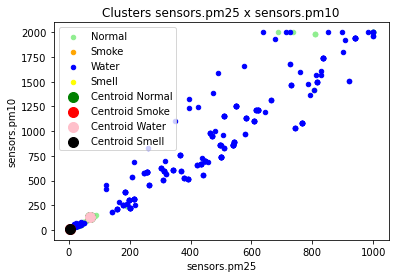

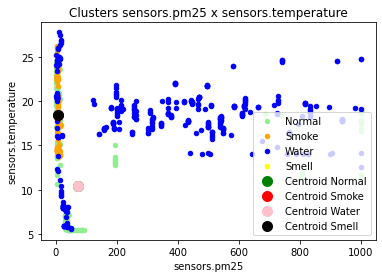

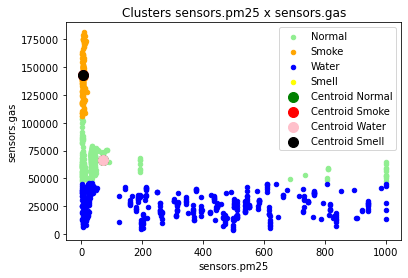

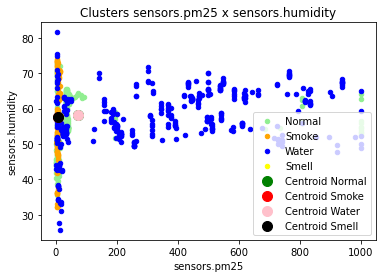

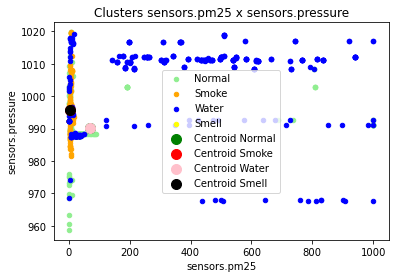

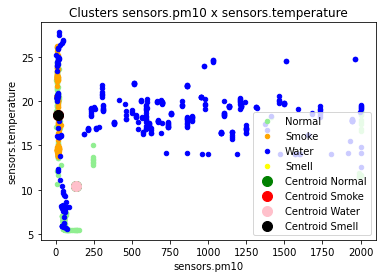

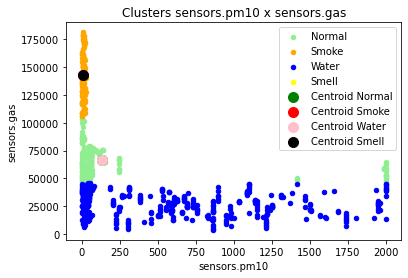

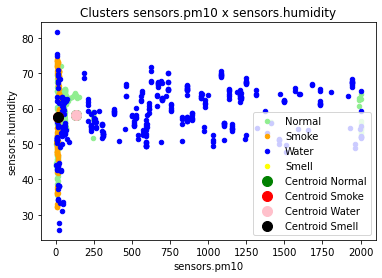

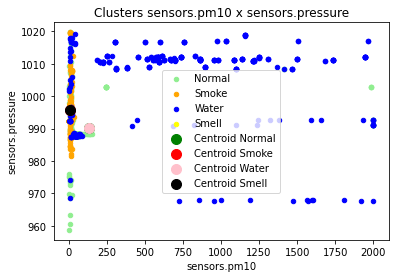

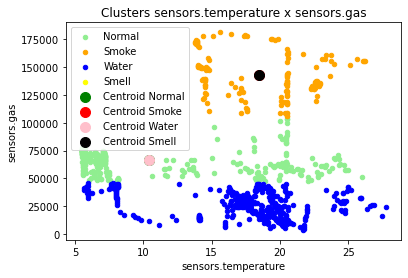

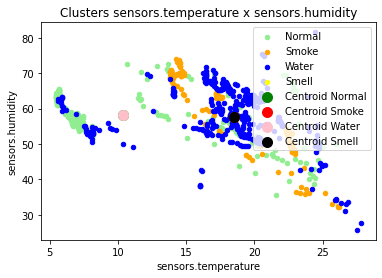

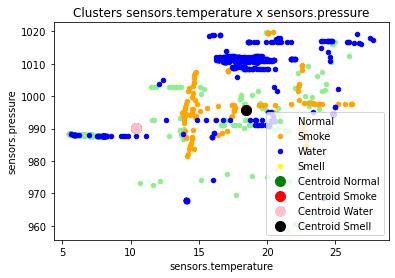

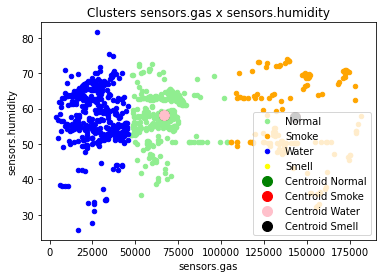

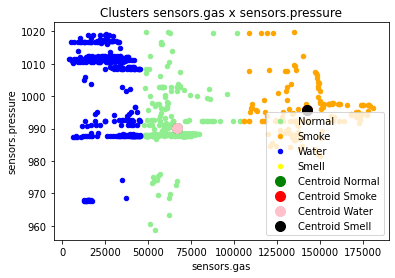

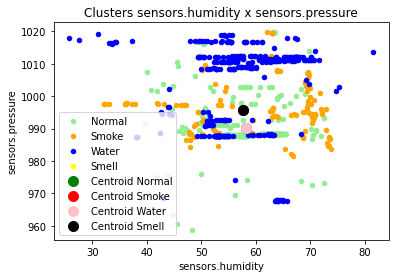

In [43]:
#Labels
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if( c1 >= c2):
            ;
        else:
            plt.scatter(X_train[kmeans.labels_ == 0][col1], X_train[kmeans.labels_ == 0][col2], s = 20, c = 'lightgreen', label = 'Normal')
            plt.scatter(X_train[kmeans.labels_ == 1][col1], X_train[kmeans.labels_ == 1][col2], s = 20, c = 'orange', label = 'Smoke')
            plt.scatter(X_train[kmeans.labels_ == 2][col1], X_train[kmeans.labels_ == 2][col2], s = 20, c = 'blue', label = 'Water')
            plt.scatter(X_train[kmeans.labels_ == 3][col1], X_train[kmeans.labels_ == 3][col2], s = 20, c = 'yellow', label = 'Smell')
            plt.scatter(kmeans_clusters[0, c1], kmeans_clusters[0, c2], s=100, c='green', label = 'Centroid Normal')
            plt.scatter(kmeans_clusters[1, c1], kmeans_clusters[1, c2], s=100, c='red', label = 'Centroid Smoke')
            plt.scatter(kmeans_clusters[0, c1], kmeans_clusters[0, c2], s=100, c='pink', label = 'Centroid Water')
            plt.scatter(kmeans_clusters[1, c1], kmeans_clusters[1, c2], s=100, c='black', label = 'Centroid Smell')
            plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend()
            plt.show()

In [44]:
#Métricas para os dados de treino
print("Algorithm: K-Means Clustering")
print('Training data Accuracy :')
show_results(y_true=y_train,y_pred=kmeans.labels_)


Algorithm: K-Means Clustering
Training data Accuracy :
=============Results=============
Accuracy =>  0.1716500553709856
Precision =>  0.13660075123767818
Mean Absolute Error => 1.158361018826135
Mean Squared Error => 1.8183831672203765
Root Mean Squared Error => 1.348474385081295
Classification Matrix :
[[ 95 150  45]
 [ 24   0 276]
 [253   0  60]]
Classification Report :
              precision    recall  f1-score   support

           0       0.26      0.33      0.29       290
           1       0.00      0.00      0.00       300
           2       0.16      0.19      0.17       313

    accuracy                           0.17       903
   macro avg       0.14      0.17      0.15       903
weighted avg       0.14      0.17      0.15       903



In [45]:
# Previsoes dados de teste
print("Algorithm: K-Means Clustering")
print('Test data Accuracy :')
show_results(y_true=y_test,y_pred=kmeans_labels_test)

Algorithm: K-Means Clustering
Test data Accuracy :
=============Results=============
Accuracy =>  0.165374677002584
Precision =>  0.14155568806731597
Mean Absolute Error => 1.1395348837209303
Mean Squared Error => 1.7493540051679586
Root Mean Squared Error => 1.3226314698992907
Classification Matrix :
[[ 46  75  19]
 [ 11   0 119]
 [ 99   0  18]]
Classification Report :
              precision    recall  f1-score   support

           0       0.29      0.33      0.31       140
           1       0.00      0.00      0.00       130
           2       0.12      0.15      0.13       117

    accuracy                           0.17       387
   macro avg       0.14      0.16      0.15       387
weighted avg       0.14      0.17      0.15       387



#### d. Model Saving 

In [46]:
filename = 'model_saves/kmeans.sav'
pickle.dump(kmeans, open(filename, 'wb'))

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

In [87]:
columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure', 'sensors.classification']
dataLOF = data[columns]
data0 = dataLOF[dataLOF['sensors.classification'] == 0]
data1 = dataLOF[dataLOF['sensors.classification'] == 1]
data1 = data1[data1['sensors.pm25'] >=400]
data1 = data1[:40]
contamination = data1.shape[0]/(data1.shape[0] + data0.shape[0])
lofDataset = shuffle(data0.append(data1))
Y_LofData = lofDataset['sensors.classification']
X_LofData = lofDataset.drop(['sensors.classification'],axis=1)
print(contamination)

0.0045682960255824575


#### b. Model Trainig

In [88]:
n_neighbors = 100 # no sklearn diz que 20 é no geral um valor bom, mas podemos otimizar depois
metric = 'minkowski' #Euclid, Minkowski, Manhattan

localOutFact = LocalOutlierFactor(n_neighbors = n_neighbors, metric = metric, contamination = contamination)

In [89]:
# fit predict with train data
lof_train_pred = localOutFact.fit_predict(X_LofData)
#lof_test_pred = localOutFact.fit_predict(X_test)
print(lof_train_pred) #1 - inlier / -1 outlier

[1 1 1 ... 1 1 1]


#### c. Output results

In [90]:
#Notas:
#LOF(k) ~ 1 means Similar density as neighbors.
#LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
#LOF(k) > 1 means Lower density than neighbors (Outlier)
#Filtro dos outliers (valores negativos)
lof_OutId = np.where(lof_train_pred < 0)
lof_OutVal = X_LofData.iloc[lof_OutId]
print("----------------------------------------")
print(lof_OutId)
print("----------------------------------------")

----------------------------------------
(array([ 229,  453,  663,  885,  899, 1237, 1326, 1524, 1666, 1941, 2695,
       2965, 3376, 3401, 3545, 3593, 4132, 4184, 4542, 4783, 4980, 5076,
       5138, 5399, 5424, 5553, 5770, 5814, 5934, 6131, 6139, 6432, 6541,
       6635, 6942, 7606, 7729, 7778, 7972, 8302]),)
----------------------------------------


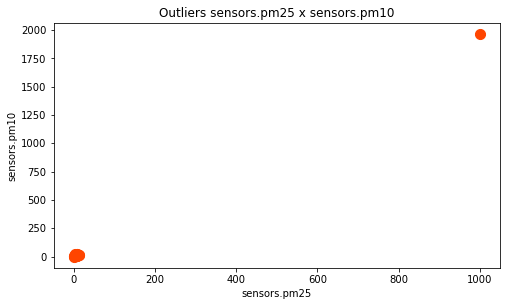

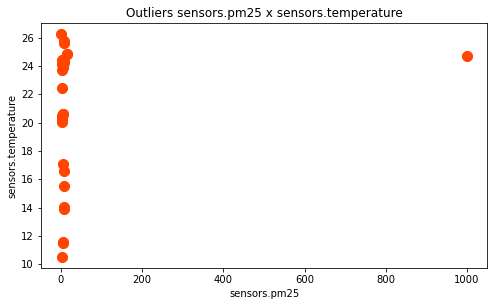

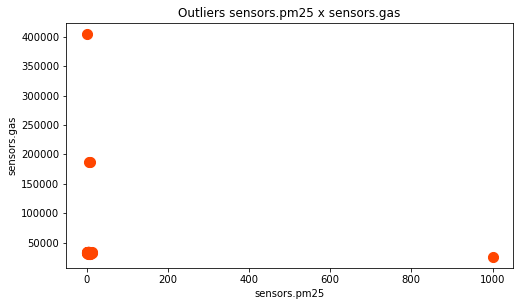

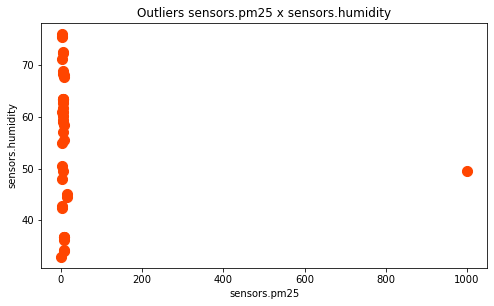

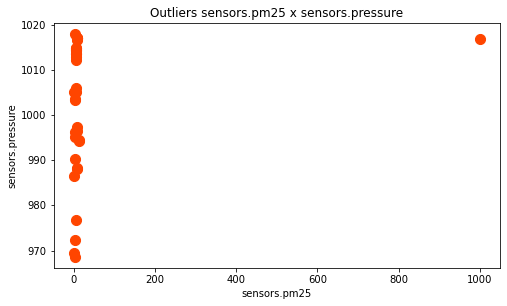

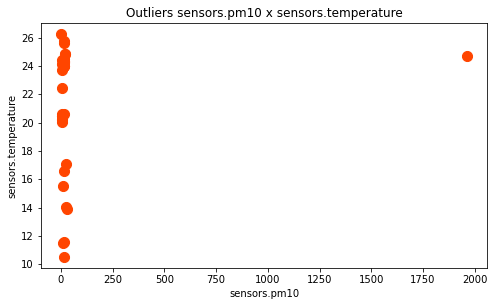

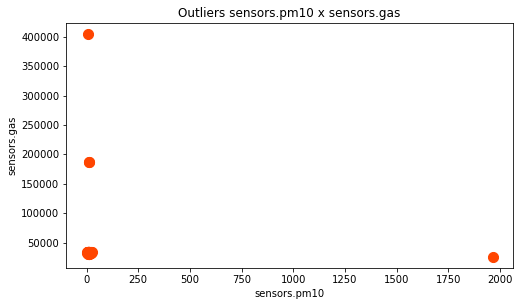

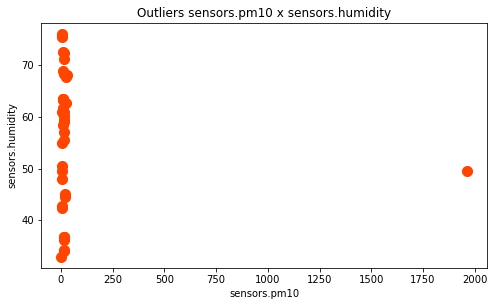

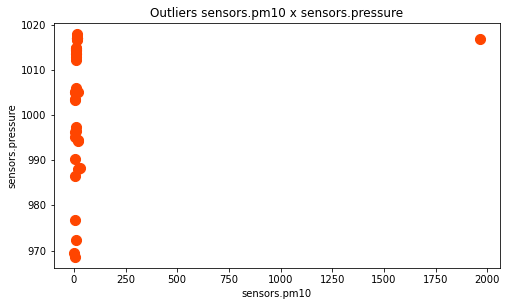

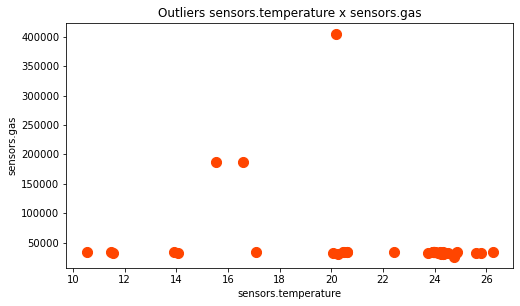

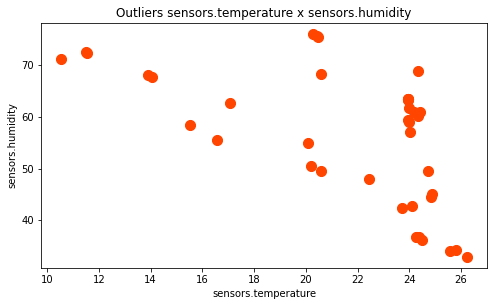

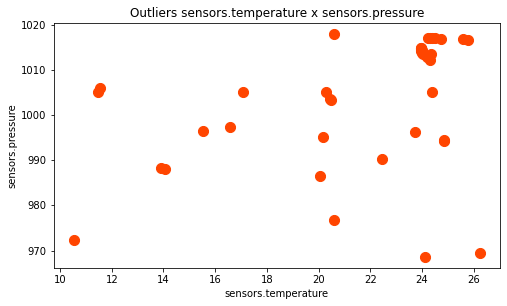

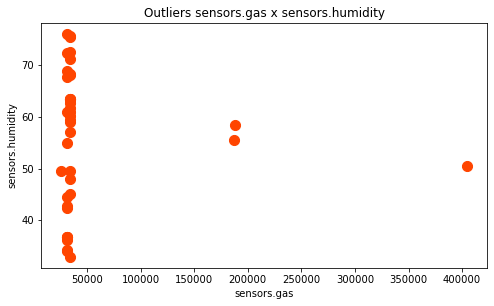

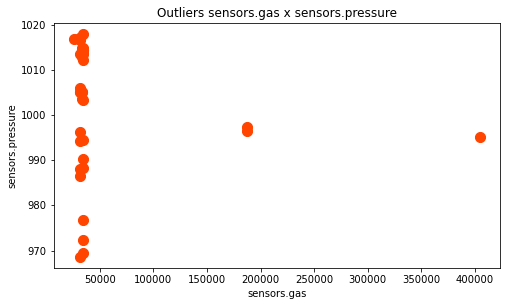

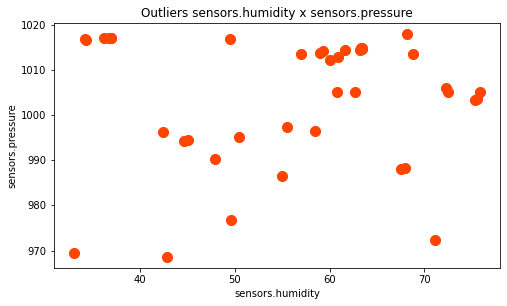

In [73]:
#Plot dos dados
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if (c1 >= c2):
            ;
        else:
            plt.figure(figsize=(8,4.5))
            plt.title('Outliers ' + str(col1) + ' x ' + str(col2))
            #plt.scatter(X_LofData[col1], X_LofData[col2], s = 100, c = 'lightgreen', label = 'Normal')
            plt.scatter(lof_OutVal[col1],lof_OutVal[col2], s = 102, c = 'orangered', label = 'Anomalias')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [91]:
#Substituição dos valores normais e anomalias por 0 e 1
lof_train_pred[lof_train_pred == 1] = 0
lof_train_pred[lof_train_pred == -1] = 1

show_results(y_true=Y_LofData,y_pred=lof_train_pred)

=============Results=============
Accuracy =>  0.9910918227501142
Precision =>  0.9910918227501142
Mean Absolute Error => 0.008908177249885792
Mean Squared Error => 0.008908177249885792
Root Mean Squared Error => 0.09438314070789228
Classification Matrix :
[[8677   39]
 [  39    1]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8716
           1       0.03      0.03      0.03        40

    accuracy                           0.99      8756
   macro avg       0.51      0.51      0.51      8756
weighted avg       0.99      0.99      0.99      8756



#### d. Model Saving 

In [66]:
filename = 'model_saves/lof.sav'
pickle.dump(localOutFact , open(filename, 'wb'))

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

In [94]:
columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure', 'sensors.classification']
isodata = data[columns]
train, test = train_test_split(isodata, test_size=.2) 
train_normal = train[train['sensors.classification']==0] 
train_outliers = train[(train['sensors.classification']==1)]
outlier_prop = len(train_outliers) / len(train_normal)
train_y = train_normal['sensors.classification']
train_normal = train_normal.drop('sensors.classification',axis=1)
test_y = test['sensors.classification']
test = test.drop('sensors.classification',axis=1)
outlier_prop

0.07039426523297491

#### b. Model Trainig

In [95]:
isoForest = IsolationForest(n_estimators = 64, max_samples = 'auto', contamination = outlier_prop, max_features = 3, behaviour = 'new')
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
isoForest.fit(train_normal)

scores = isoForest.decision_function(train_normal)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


#### c. Output results

In [96]:
#y_pred_train = model.predict(X_train)
isoForest_y_pred = isoForest.predict(test)

#print(y_pred_train) #anomalias = -1
print(isoForest_y_pred)

[ 1 -1  1 ...  1  1  1]


(array([   4,    5,   10,   23,   34,   35,   38,   43,   45,   51,   52,
         54,   64,   67,   68,   71,   76,   78,  101,  103,  104,  113,
        121,  125,  133,  145,  174,  186,  189,  191,  209,  217,  218,
        219,  224,  229,  231,  242,  243,  246,  252,  255,  259,  272,
        277,  279,  281,  283,  289,  307,  314,  315,  318,  351,  355,
        356,  361,  364,  378,  380,  386,  393,  403,  409,  411,  413,
        423,  426,  427,  430,  440,  452,  453,  456,  459,  474,  488,
        489,  494,  497,  499,  502,  504,  512,  514,  541,  543,  551,
        562,  581,  583,  584,  585,  587,  594,  610,  622,  634,  642,
        644,  658,  664,  665,  671,  681,  686,  689,  690,  695,  698,
        704,  711,  724,  758,  761,  783,  797,  803,  805,  811,  822,
        849,  859,  874,  878,  885,  890,  899,  903,  904,  917,  922,
        926,  936,  941,  954,  955,  961,  979,  980,  982, 1016, 1021,
       1033, 1037, 1038, 1045, 1054, 1057, 1058, 1

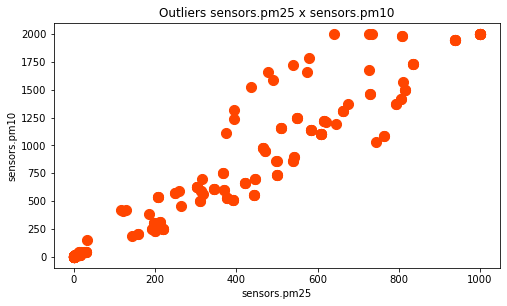

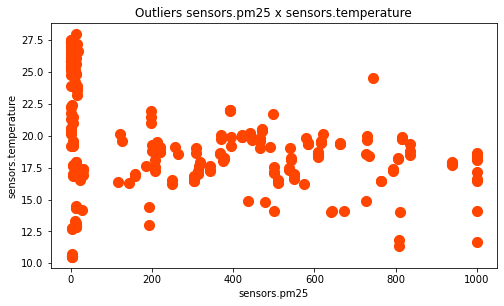

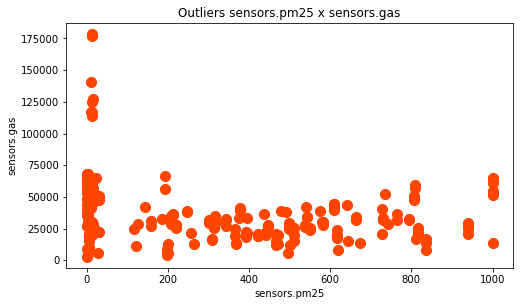

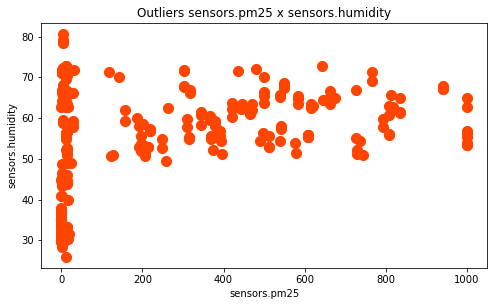

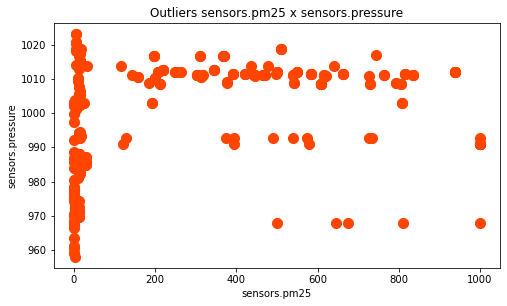

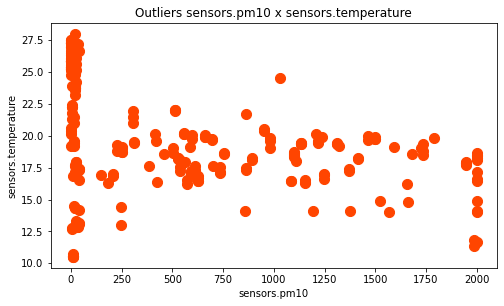

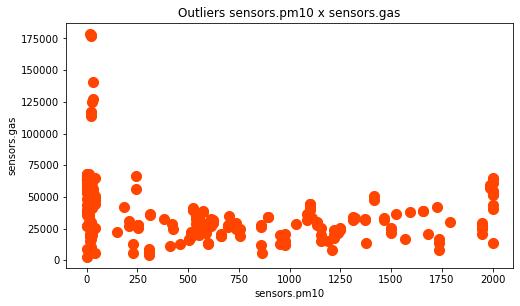

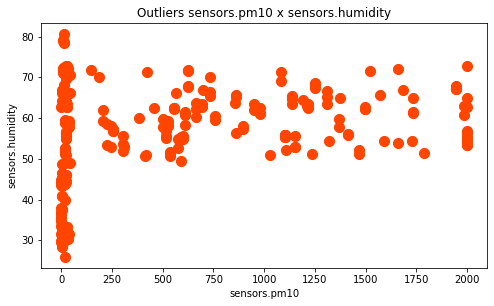

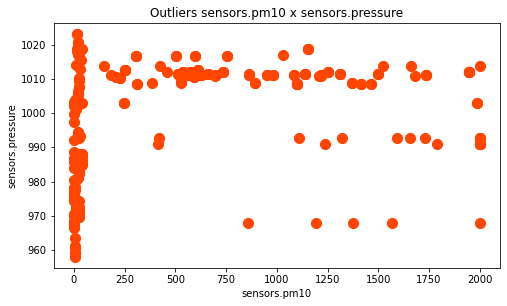

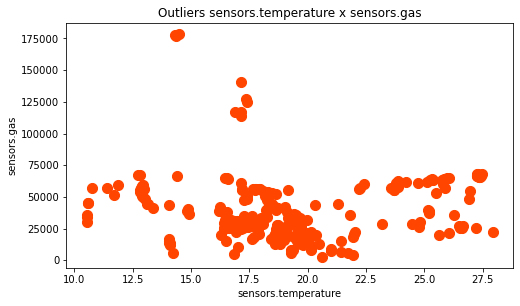

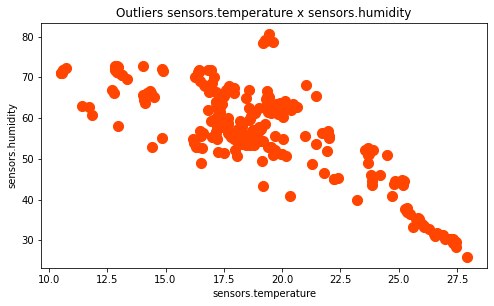

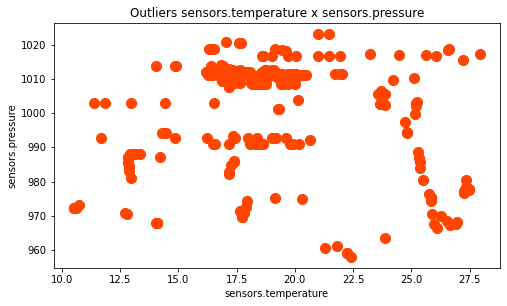

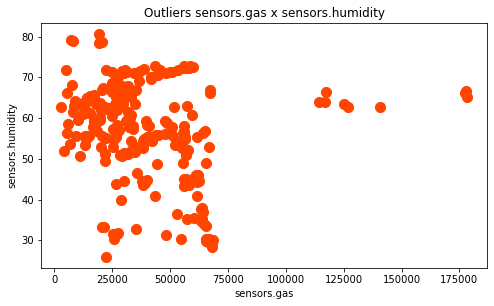

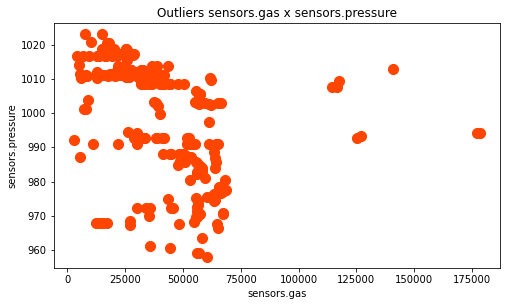

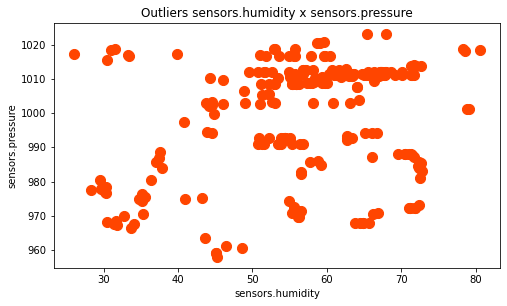

In [84]:
#Anomalias
isoForest_OutIdx = np.where(isoForest_y_pred == -1)
isoForest_OutVal = test.iloc[isoForest_OutIdx]

print(isoForest_OutIdx)

#Plot Outliers Values
for c1, col1 in enumerate(train_normal.columns):
    for c2, col2 in enumerate(train_normal.columns):
        if (c1 >= c2):
            ;
        else:
            plt.figure(figsize=(8,4.5))
            plt.title('Outliers ' + str(col1) + ' x ' + str(col2))
            #plt.scatter(test[col1], test[col2], s = 100, c = 'lightgreen', label = 'Normal')
            plt.scatter(isoForest_OutVal[col1],isoForest_OutVal[col2], s = 102, c = 'orangered', label = 'Anomalias')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [97]:
#Substituição dos valores normais e anomalias por 0 e 1
isoForest_y_pred[isoForest_y_pred == 1] = 0
isoForest_y_pred[isoForest_y_pred == -1] = 1

#Métricas aplicadas aos dados de teste (X_test)
show_results(y_true=test_y,y_pred=isoForest_y_pred)

=============Results=============
Accuracy =>  0.9364316239316239
Precision =>  0.9671119061297679
Mean Absolute Error => 0.06356837606837606
Mean Squared Error => 0.06356837606837606
Root Mean Squared Error => 0.25212769793970685
Classification Matrix :
[[1626  115    0]
 [   0  127    0]
 [   0    4    0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1741
           1       0.52      1.00      0.68       127
           2       0.00      0.00      0.00         4

    accuracy                           0.94      1872
   macro avg       0.51      0.64      0.55      1872
weighted avg       0.97      0.94      0.94      1872



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### d. Model Saving 

In [72]:
filename = 'model_saves/isolationforest.sav'
pickle.dump(isoForest, open(filename, 'wb'))

### 4.4 One Class SVM

#### a. Data preparation for input

In [100]:
columns = ['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure', 'sensors.classification']
svmdata = data[columns]
train, test = train_test_split(svmdata, test_size=.2) 
train_normal = train[train['sensors.classification']==0] 
train_outliers = train[(train['sensors.classification']==1)]
outlier_prop = len(train_outliers) / len(train_normal)
train_y = train_normal['sensors.classification']
train_normal = train_normal.drop('sensors.classification',axis=1)
test_y = test['sensors.classification']
test = test.drop('sensors.classification',axis=1)
outlier_prop

0.07025089605734768

#### b. Model Train

In [103]:
oneClassSVM = OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=0.00001,shrinking=False)
oneClassSVM.fit(train_normal)

OneClassSVM(gamma=1e-05, nu=0.07025089605734768, shrinking=False)

#### c. Output Results

Text(0, 0.5, 'pm10')

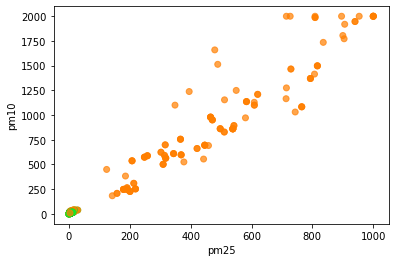

In [104]:
oneclassSVM_pred = oneClassSVM.predict(test)
oneclassSVM_pred[oneclassSVM_pred == 1] = 0
oneclassSVM_pred[oneclassSVM_pred == -1] = 1
colors = np.array(['#18e52a', '#ff7f00']) 
plt.scatter(test['sensors.pm25'] , test['sensors.pm10'] , alpha=0.7, c=colors[oneclassSVM_pred])
plt.xlabel('pm25') 
plt.ylabel('pm10')

In [105]:
show_results(test_y,oneclassSVM_pred)

=============Results=============
Accuracy =>  0.782051282051282
Precision =>  0.9478690017009656
Mean Absolute Error => 0.21794871794871795
Mean Squared Error => 0.21794871794871795
Root Mean Squared Error => 0.46684978092392626
Classification Matrix :
[[1336  405    0]
 [   0  128    0]
 [   0    3    0]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1741
           1       0.24      1.00      0.39       128
           2       0.00      0.00      0.00         3

    accuracy                           0.78      1872
   macro avg       0.41      0.59      0.42      1872
weighted avg       0.95      0.78      0.83      1872



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### d. Model Saving

In [77]:
filename = 'model_saves/oneclasssvm.sav'
pickle.dump(oneClassSVM, open(filename, 'wb'))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section

### Supervised algorithm

In [39]:
X_sample = X_test
Y_sample = y_test

In [40]:
supervisedModels = {'SVM-Grid': grid,
                    'NeuralNet-Keras' : nn,
                    'NeuralNet2-SKL' : sklNN,
                    'NaiveBayes' : gaussNB,
                    'RandForest' : randForestReg
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in supervisedModels.items():
    tempPreds = model.predict(X_sample)
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds.round())
    tempPrecision = metrics.precision_score(Y_sample, tempPreds.round())
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')
    

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
SVM-Grid	|	1.0	|	1.0	|
NeuralNet-Keras	|	0.99	|	0.99	|
NeuralNet2-SKL	|	1.0	|	1.0	|
NaiveBayes	|	0.98	|	0.92	|
RandForest	|	1.0	|	1.0	|


### Unsupervised algorithms

In [82]:
unsupervisedModels = {'k-means-cluster': kmeans,
                    'isolationForest' : isoForest,
                    'oneClassSVN' : oneClassSVM
                    }
accuracies = {}
precisions = {}
print('Model\t\t|     Accuracy\t|    Precision\t|')
print('----------------|--------------------------------')
for name,model in unsupervisedModels.items():
    tempPreds = model.predict(X_sample)
    if (name == 'isolationForest') or (name == 'oneClassSVN'):
        tempPreds[tempPreds == 1] = 0
        tempPreds[tempPreds == -1] = 1
    tempAccuracy = metrics.accuracy_score(Y_sample, tempPreds)
    tempPrecision = metrics.precision_score(Y_sample, tempPreds)
    tempAccuracy =  round(tempAccuracy,2)
    tempPrecision = round(tempPrecision,2)
    accuracies[name] = tempAccuracy
    precisions[name] = tempPrecision
    print(name + '\t|\t' + str(tempAccuracy) + '\t|\t' + str(tempPrecision)+ '\t|')

Model		|     Accuracy	|    Precision	|
----------------|--------------------------------
k-means-cluster	|	0.22	|	0.03	|
isolationForest	|	0.75	|	0.49	|
oneClassSVN	|	0.71	|	0.45	|
